In [ ]:
#https://towardsdatascience.com/5-types-of-regression-and-their-properties

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/doubts/orange_dataset.csv')

In [9]:
df.shape

(35, 4)

In [10]:
df.columns

Index(['Unnamed: 0', 'Tree', 'age', 'circumference'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
Unnamed: 0       35 non-null int64
Tree             35 non-null int64
age              35 non-null int64
circumference    35 non-null int64
dtypes: int64(4)
memory usage: 1.2 KB


In [12]:
df.describe()

,Unnamed: 0,Tree,age,circumference
count,35.000000,35.00000,35.000000,35.000000
mean,18.000000,3.00000,922.142857,115.857143
std,10.246951,1.43486,491.864528,57.488179
min,1.000000,1.00000,118.000000,30.000000
25%,9.500000,2.00000,484.000000,65.500000
50%,18.000000,3.00000,1004.000000,115.000000
75%,26.500000,4.00000,1372.000000,161.500000
max,35.000000,5.00000,1582.000000,214.000000


In [13]:
df

,Unnamed: 0,Tree,age,circumference
0,1,1,118,30
1,2,1,484,58
2,3,1,664,87
3,4,1,1004,115
4,5,1,1231,120
5,6,1,1372,142
6,7,1,1582,145
7,8,2,118,33
8,9,2,484,69
9,10,2,664,111


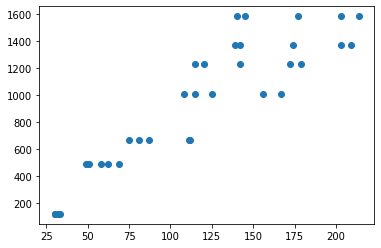

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df["circumference"],df["age"])

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [16]:
df["circumference"].values.shape

(35,)

In [17]:
df.head(2)

,Unnamed: 0,Tree,age,circumference
0,1,1,118,30
1,2,1,484,58


In [18]:
X = df["circumference"].values.reshape(-1,1)
Y =df ["age"]

In [20]:
Y.shape

(35,)

In [21]:
X.shape

(35, 1)

In [22]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.score(X,Y)

0.8345166945883684

In [24]:
Y_pred = model.predict(X)

In [25]:
Y_pred

array([ 251.08356218,  469.9315186 ,  696.59547348,  915.44342991,
        954.52342212, 1126.47538789, 1149.92338322,  274.53155751,
        555.90750149,  884.17943613, 1235.8993661 , 1360.95534121,
       1603.25129297, 1603.25129297,  251.08356218,  415.2195295 ,
        602.80349215,  860.7314408 ,  915.44342991, 1103.02739256,
       1110.843391  ,  266.71555906,  501.19551238,  891.99543457,
       1321.87534899, 1415.66733031, 1650.14728363, 1689.22727585,
        251.08356218,  399.58753261,  649.69948281,  993.60341434,
       1126.47538789, 1376.58733809, 1400.03533342])

In [28]:
Y_true = Y

In [29]:
from  sklearn.metrics import  mean_squared_error
mean_squared_error(Y_true,Y_pred)

38891.62301543713

In [30]:
model.coef_

array([7.81599844])

In [31]:
model.intercept_

16.60360886081719

In [38]:
def viz_linear_regression():
    plt.scatter(X,Y,color='red')
    plt.plot(X,model.predict(X),color='blue')
    plt.title('Analysis of orange dataset (Linear Regression)')
    plt.xlabel('Circumference')
    plt.ylabel('Age')
    plt.show()
    return

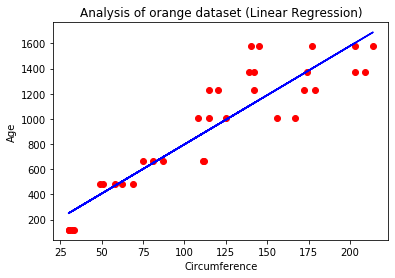

In [39]:
viz_linear_regression()

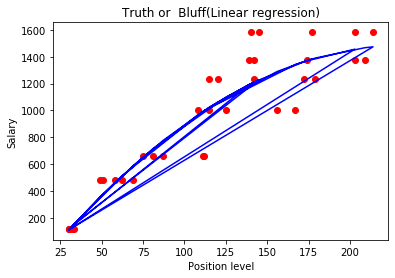

In [47]:
#fitting polynomial Regression  to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,Y)


#visualization the polynomial Regression result
def viz_polymonial():
    plt.scatter(X,Y,color='red')
    plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or  Bluff(Linear regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()


In [48]:
#from sklearn.metrics  import  mean_squared_error

mean_squared_error(Y_true, pol_reg.predict(poly_reg.fit_transform(X)))

28835.260019259575